In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
#create an empty list to collect all reviews
reviews  = []

#create an empty list to collect rating stars
stars = []

#create an empty list to collect date
date = []

#create an empty list to collect country the reviewer is from
country = []

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
page_size = 500
for i in range(1, 100):
    page = requests.get(f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}")
    
    soup = BeautifulSoup(page.content, 'html.parser')
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
    
    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
            
    #date
    for item in soup.find_all("time"):
        date.append(item.text)
        
    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 7
Error on page 7
Error on page 7
Error on page 8
Error on page 8


In [3]:
len(reviews)

3901

In [4]:
len(stars)

4000

In [5]:
len(date)

3901

In [6]:
#check the length 
stars = stars[:len(reviews)]

In [7]:
len(country)

3901

In [49]:
#create  a dataframe from these collected lists of data

df = pd.DataFrame({"reviews":reviews,"stars": stars, "date":date, "country": country})

In [50]:
df

,reviews,stars,date,country
0,✅ Trip Verified | This was the first time I ...,\n\t\t\t\t\t\t\t\t\t\t\t\t5,14th December 2024,United States
1,✅ Trip Verified | Pretty good flight but sti...,2,13th December 2024,United Kingdom
2,"✅ Trip Verified | Check in was fine, but no pr...",8,12th December 2024,United Kingdom
3,✅ Trip Verified | British Airways is absolute ...,7,6th December 2024,United Kingdom
4,✅ Trip Verified | The flight time was changed ...,1,2nd December 2024,United Kingdom
...,...,...,...,...
3896,Flew LHR - VIE return operated by bmi but BA a...,4,29th August 2012,United Kingdom
3897,LHR to HAM. Purser addresses all club passenge...,1,28th August 2012,United Kingdom
3898,My son who had worked for British Airways urge...,4,12th October 2011,United Kingdom
3899,London City-New York JFK via Shannon on A318 b...,4,11th October 2011,United States


**Data Cleaning**

In [68]:
df.isnull().sum()

reviews                   0
stars                     0
date                      0
country                   0
Verified /Not Verified    0
Corpus                    0
dtype: int64

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#regrex
import re

In [52]:
df["Verified /Not Verified"]=df["reviews"].str.contains("Trip Verified")
# new feature - trip verified or not verified

In [53]:
df["Verified /Not Verified"].value_counts()

Verified /Not Verified
False    2605
True     1296
Name: count, dtype: int64

In [54]:
df["Verified /Not Verified"]=df["Verified /Not Verified"].astype(str)

In [55]:
df

,reviews,stars,date,country,Verified /Not Verified
0,✅ Trip Verified | This was the first time I ...,\n\t\t\t\t\t\t\t\t\t\t\t\t5,14th December 2024,United States,True
1,✅ Trip Verified | Pretty good flight but sti...,2,13th December 2024,United Kingdom,True
2,"✅ Trip Verified | Check in was fine, but no pr...",8,12th December 2024,United Kingdom,True
3,✅ Trip Verified | British Airways is absolute ...,7,6th December 2024,United Kingdom,True
4,✅ Trip Verified | The flight time was changed ...,1,2nd December 2024,United Kingdom,True
...,...,...,...,...,...
3896,Flew LHR - VIE return operated by bmi but BA a...,4,29th August 2012,United Kingdom,False
3897,LHR to HAM. Purser addresses all club passenge...,1,28th August 2012,United Kingdom,False
3898,My son who had worked for British Airways urge...,4,12th October 2011,United Kingdom,False
3899,London City-New York JFK via Shannon on A318 b...,4,11th October 2011,United States,False


**Reviews**

In [58]:
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

lemma = WordNetLemmatizer()

# Step 1: Clean the `reviews` column
review_data = df['reviews'].str.replace("✅ Trip Verified |", " ", regex=False)
review_data = review_data.str.replace("Not Verified |", " ", regex=False)

# Step 2: Preprocess each review
corpus = []
for rev in review_data:
    # Remove non-alphabetic characters
    rev = re.sub("[^a-zA-Z]", " ", rev)
    # Convert to lowercase and split into words
    rev = rev.lower().split()
    # Lemmatize and remove stopwords
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    # Join the cleaned words back into a single string
    rev = " ".join(rev)
    corpus.append(rev)

# Step 3: Add the cleaned corpus back to the DataFrame
df["Corpus"] = corpus

df

,reviews,stars,date,country,Verified /Not Verified,Corpus
0,✅ Trip Verified | This was the first time I ...,\n\t\t\t\t\t\t\t\t\t\t\t\t5,14th December 2024,United States,True,first time flew british airway huge disappoint...
1,✅ Trip Verified | Pretty good flight but sti...,2,13th December 2024,United Kingdom,True,pretty good flight still small thing improved ...
2,"✅ Trip Verified | Check in was fine, but no pr...",8,12th December 2024,United Kingdom,True,check fine priority fast track line security b...
3,✅ Trip Verified | British Airways is absolute ...,7,6th December 2024,United Kingdom,True,british airway absolute rubbish fly amsterdam ...
4,✅ Trip Verified | The flight time was changed ...,1,2nd December 2024,United Kingdom,True,flight time changed last minute without warnin...
...,...,...,...,...,...,...
3896,Flew LHR - VIE return operated by bmi but BA a...,4,29th August 2012,United Kingdom,False,flew lhr vie return operated bmi ba aircraft a...
3897,LHR to HAM. Purser addresses all club passenge...,1,28th August 2012,United Kingdom,False,lhr ham purser address club passenger name boa...
3898,My son who had worked for British Airways urge...,4,12th October 2011,United Kingdom,False,son worked british airway urged fly british ai...
3899,London City-New York JFK via Shannon on A318 b...,4,11th October 2011,United States,False,london city new york jfk via shannon really ni...


In [59]:
df

,reviews,stars,date,country,Verified /Not Verified,Corpus
0,✅ Trip Verified | This was the first time I ...,\n\t\t\t\t\t\t\t\t\t\t\t\t5,14th December 2024,United States,True,first time flew british airway huge disappoint...
1,✅ Trip Verified | Pretty good flight but sti...,2,13th December 2024,United Kingdom,True,pretty good flight still small thing improved ...
2,"✅ Trip Verified | Check in was fine, but no pr...",8,12th December 2024,United Kingdom,True,check fine priority fast track line security b...
3,✅ Trip Verified | British Airways is absolute ...,7,6th December 2024,United Kingdom,True,british airway absolute rubbish fly amsterdam ...
4,✅ Trip Verified | The flight time was changed ...,1,2nd December 2024,United Kingdom,True,flight time changed last minute without warnin...
...,...,...,...,...,...,...
3896,Flew LHR - VIE return operated by bmi but BA a...,4,29th August 2012,United Kingdom,False,flew lhr vie return operated bmi ba aircraft a...
3897,LHR to HAM. Purser addresses all club passenge...,1,28th August 2012,United Kingdom,False,lhr ham purser address club passenger name boa...
3898,My son who had worked for British Airways urge...,4,12th October 2011,United Kingdom,False,son worked british airway urged fly british ai...
3899,London City-New York JFK via Shannon on A318 b...,4,11th October 2011,United States,False,london city new york jfk via shannon really ni...


In [63]:
df[df["Verified /Not Verified"]=="False"]

,reviews,stars,date,country,Verified /Not Verified,Corpus
7,Not Verified | British Airways stranding my w...,1,2024-11-18,United States,False,british airway stranding wife heathrow airport...
10,Not Verified | The worst airline I have ever f...,10,2024-11-13,Australia,False,worst airline ever flown cancelled flight hour...
18,Not Verified | I paid for seats 80 A and B on...,1,2024-11-03,United States,False,paid seat b flight heathrow boston paying prem...
19,"Not Verified | The flight wasn’t that bad, alt...",3,2024-11-03,United Kingdom,False,flight bad although inflight entertainment gre...
21,Not Verified | I was very impressed with thei...,1,2024-11-02,Canada,False,impressed efficient boarding relatively compar...
...,...,...,...,...,...,...
3896,Flew LHR - VIE return operated by bmi but BA a...,4,2012-08-29,United Kingdom,False,flew lhr vie return operated bmi ba aircraft a...
3897,LHR to HAM. Purser addresses all club passenge...,1,2012-08-28,United Kingdom,False,lhr ham purser address club passenger name boa...
3898,My son who had worked for British Airways urge...,4,2011-10-12,United Kingdom,False,son worked british airway urged fly british ai...
3899,London City-New York JFK via Shannon on A318 b...,4,2011-10-11,United States,False,london city new york jfk via shannon really ni...


**Date**

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3896 entries, 0 to 3900
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   reviews                 3896 non-null   object        
 1   stars                   3896 non-null   object        
 2   date                    3896 non-null   datetime64[ns]
 3   country                 3896 non-null   object        
 4   Verified /Not Verified  3896 non-null   object        
 5   Corpus                  3896 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 213.1+ KB


In [61]:
df['date'] = df['date'].str.replace(r'(st|nd|rd|th)', '', regex=True)


df['date'] = df['date'].str.replace('Augu', 'August', regex=False)


df['date'] = pd.to_datetime(df['date'], format="%d %B %Y", errors='coerce')

df

,reviews,stars,date,country,Verified /Not Verified,Corpus
0,✅ Trip Verified | This was the first time I ...,\n\t\t\t\t\t\t\t\t\t\t\t\t5,2024-12-14,United States,True,first time flew british airway huge disappoint...
1,✅ Trip Verified | Pretty good flight but sti...,2,2024-12-13,United Kingdom,True,pretty good flight still small thing improved ...
2,"✅ Trip Verified | Check in was fine, but no pr...",8,2024-12-12,United Kingdom,True,check fine priority fast track line security b...
3,✅ Trip Verified | British Airways is absolute ...,7,2024-12-06,United Kingdom,True,british airway absolute rubbish fly amsterdam ...
4,✅ Trip Verified | The flight time was changed ...,1,2024-12-02,United Kingdom,True,flight time changed last minute without warnin...
...,...,...,...,...,...,...
3896,Flew LHR - VIE return operated by bmi but BA a...,4,2012-08-29,United Kingdom,False,flew lhr vie return operated bmi ba aircraft a...
3897,LHR to HAM. Purser addresses all club passenge...,1,2012-08-28,United Kingdom,False,lhr ham purser address club passenger name boa...
3898,My son who had worked for British Airways urge...,4,2011-10-12,United Kingdom,False,son worked british airway urged fly british ai...
3899,London City-New York JFK via Shannon on A318 b...,4,2011-10-11,United States,False,london city new york jfk via shannon really ni...


In [46]:
df

,reviews,stars,date,country,Verified /Not Verified,Corpus
0,✅ Trip Verified | This was the first time I ...,\n\t\t\t\t\t\t\t\t\t\t\t\t5,2024-12-14,United States,True,trip verified first time flew british airway h...
1,✅ Trip Verified | Pretty good flight but sti...,2,2024-12-13,United Kingdom,True,trip verified pretty good flight still small t...
2,"✅ Trip Verified | Check in was fine, but no pr...",8,2024-12-12,United Kingdom,True,trip verified check fine priority fast track l...
3,✅ Trip Verified | British Airways is absolute ...,7,2024-12-06,United Kingdom,True,trip verified british airway absolute rubbish ...
4,✅ Trip Verified | The flight time was changed ...,1,2024-12-02,United Kingdom,True,trip verified flight time changed last minute ...
...,...,...,...,...,...,...
3896,Flew LHR - VIE return operated by bmi but BA a...,4,2012-08-29,United Kingdom,False,flew lhr vie return operated bmi ba aircraft a...
3897,LHR to HAM. Purser addresses all club passenge...,1,2012-08-28,United Kingdom,False,lhr ham purser address club passenger name boa...
3898,My son who had worked for British Airways urge...,4,2011-10-12,United Kingdom,False,son worked british airway urged fly british ai...
3899,London City-New York JFK via Shannon on A318 b...,4,2011-10-11,United States,False,london city new york jfk via shannon really ni...


**Rating**

In [64]:
#check for unique values
df.stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t5', '2', '8', '7', '1', '4', '10', '3',
       '6', '9', '5', 'None'], dtype=object)

In [65]:
# remove the \t and \n from the ratings
df.stars = df.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [66]:
df.stars.value_counts()

stars
1       944
2       444
3       429
8       388
10      337
9       322
7       321
4       261
5       249
6       201
None      5
Name: count, dtype: int64

In [79]:
df["stars"] = pd.to_numeric(df["stars"], errors="coerce")

In [80]:
df

,reviews,stars,date,country,Verified /Not Verified,Corpus
0,✅ Trip Verified | This was the first time I ...,5,2024-12-14,United States,True,first time flew british airway huge disappoint...
1,✅ Trip Verified | Pretty good flight but sti...,2,2024-12-13,United Kingdom,True,pretty good flight still small thing improved ...
2,"✅ Trip Verified | Check in was fine, but no pr...",8,2024-12-12,United Kingdom,True,check fine priority fast track line security b...
3,✅ Trip Verified | British Airways is absolute ...,7,2024-12-06,United Kingdom,True,british airway absolute rubbish fly amsterdam ...
4,✅ Trip Verified | The flight time was changed ...,1,2024-12-02,United Kingdom,True,flight time changed last minute without warnin...
...,...,...,...,...,...,...
3896,Flew LHR - VIE return operated by bmi but BA a...,4,2012-08-29,United Kingdom,False,flew lhr vie return operated bmi ba aircraft a...
3897,LHR to HAM. Purser addresses all club passenge...,1,2012-08-28,United Kingdom,False,lhr ham purser address club passenger name boa...
3898,My son who had worked for British Airways urge...,4,2011-10-12,United Kingdom,False,son worked british airway urged fly british ai...
3899,London City-New York JFK via Shannon on A318 b...,4,2011-10-11,United States,False,london city new york jfk via shannon really ni...


**Data Exploration**

In [81]:
import datetime as dt

from wordcloud import WordCloud, STOPWORDS

Text(0.5, 0.98, 'Counts for each ratings')

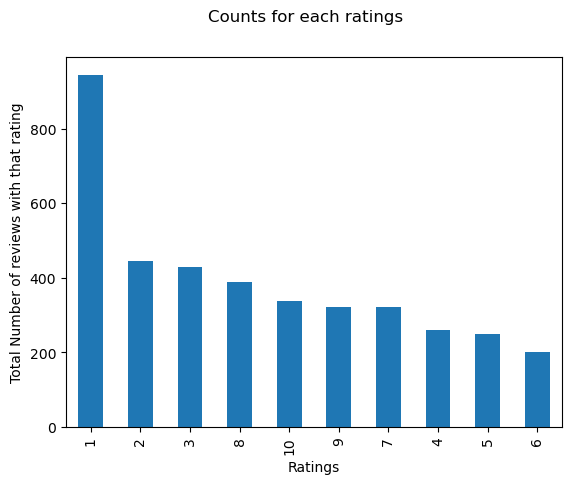

In [82]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [96]:
df_rating = pd.DataFrame(df["stars"].value_counts()).reset_index()
df_rating.columns = ["rating", "total_counts"]

In [97]:
df_rating

,rating,total_counts
0,1,944
1,2,444
2,3,429
3,8,388
4,10,337
5,9,322
6,7,321
7,4,261
8,5,249
9,6,201


In [102]:
pct_values = (df_rating['total_counts'].values / df_rating['total_counts'].sum() * 100).tolist()
pct_values = [round(x, 2) for x in pct_values]
df_rating['pct_values'] = pct_values

In [103]:
df_rating

,rating,total_counts,pct_values
0,1,944,24.23
1,2,444,11.40
2,3,429,11.01
3,8,388,9.96
4,10,337,8.65
5,9,322,8.26
6,7,321,8.24
7,4,261,6.70
8,5,249,6.39
9,6,201,5.16


Text(0.5, 1.0, 'Counts for each ratings')

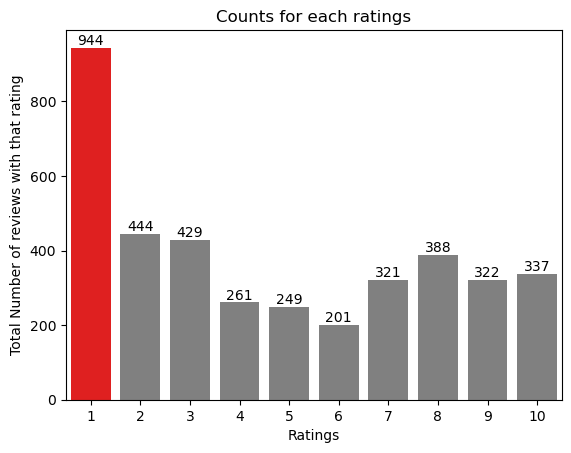

In [105]:
clrs = ['Red' if (x ==  max(df_rating.total_counts)) else 'grey' for x in df_rating.total_counts ]


ax = sns.barplot(x=df_rating.rating, y=df_rating.total_counts, data=df_rating, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [106]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

75 unique countries


In [111]:
df_country_review = pd.DataFrame(df.country.value_counts().head(10)).reset_index()

In [113]:
df_country_review.rename(columns={'country':'country','count':'total_reviews'}, inplace=True)

In [114]:
df_country_review

,country,total_reviews
0,United Kingdom,2436
1,United States,446
2,Australia,164
3,Canada,125
4,Germany,68
5,South Africa,43
6,Ireland,42
7,Switzerland,40
8,Netherlands,35
9,Singapore,31


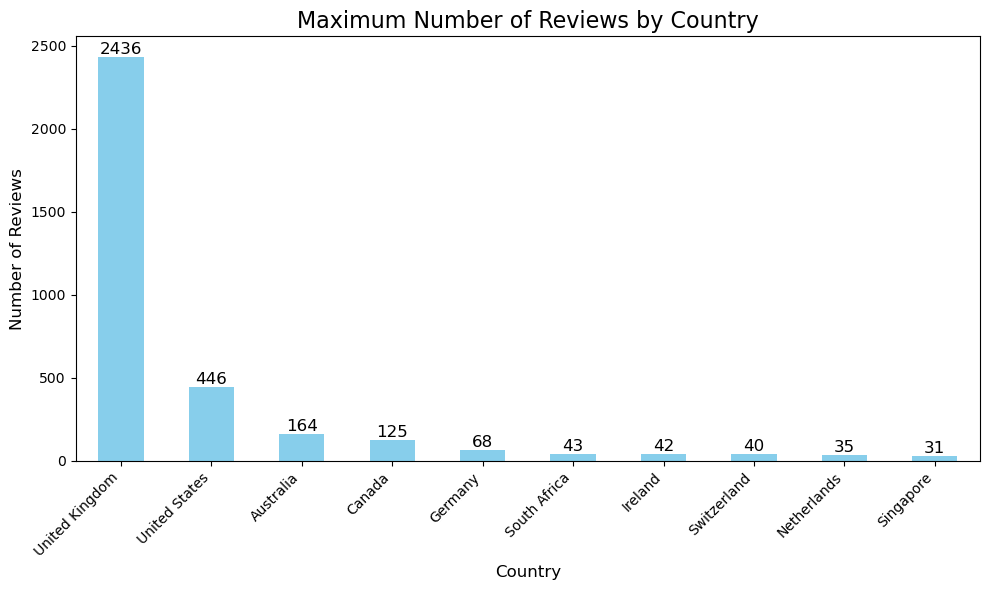

In [116]:
# Assuming df_country_review contains 'country' and corresponding counts
ax = df_country_review.plot(kind="bar", x='country', figsize=(10, 6), legend=False, color='skyblue')

# Annotate bars with counts
for bar in ax.patches:
    count = int(bar.get_height())  # Get bar height (count)
    ax.annotate(
        f'{count}',  # Text to display
        (bar.get_x() + bar.get_width() / 2, count),  # Position
        ha='center', va='bottom', fontsize=12, color='black'
    )

# Customize chart appearance
plt.title("Maximum Number of Reviews by Country", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

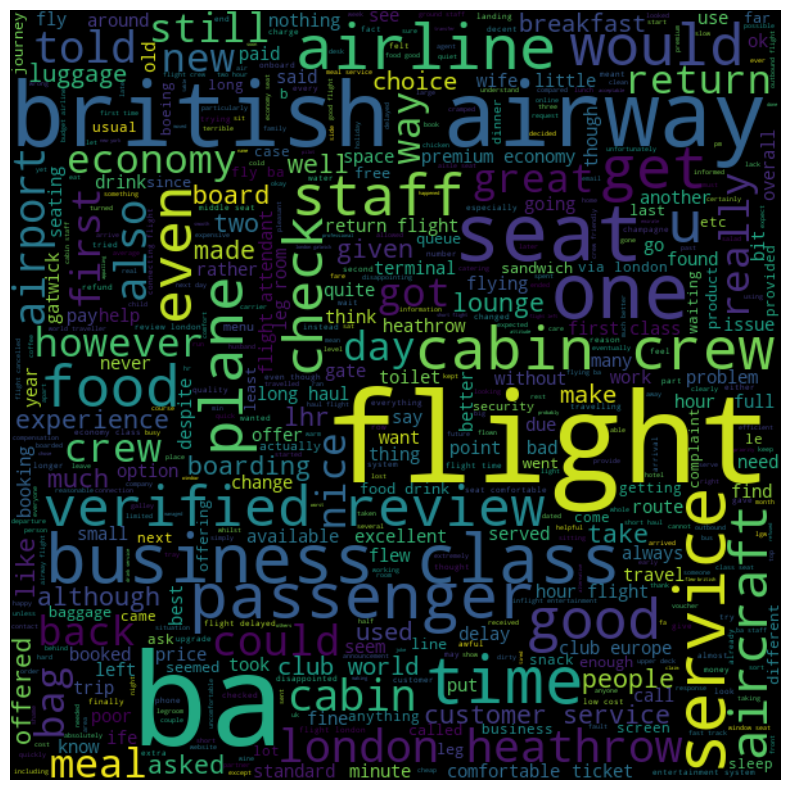

In [121]:

# Start with one review:
reviews = " ".join(df.Corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

(-0.5, 499.5, 499.5, -0.5)

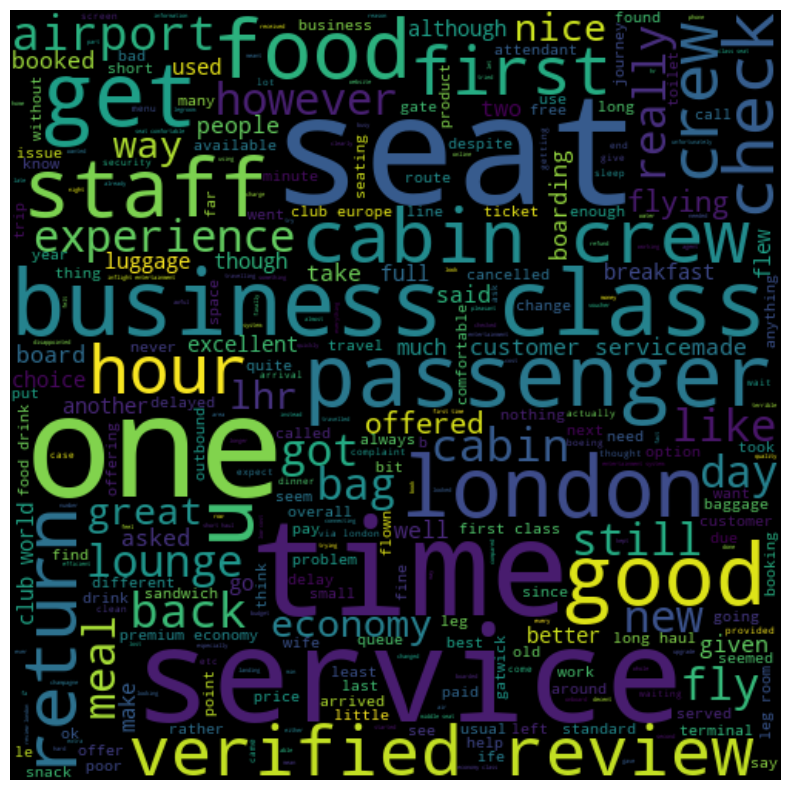

In [126]:
plt.figure(figsize=(20,10))

stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [130]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'experience')])

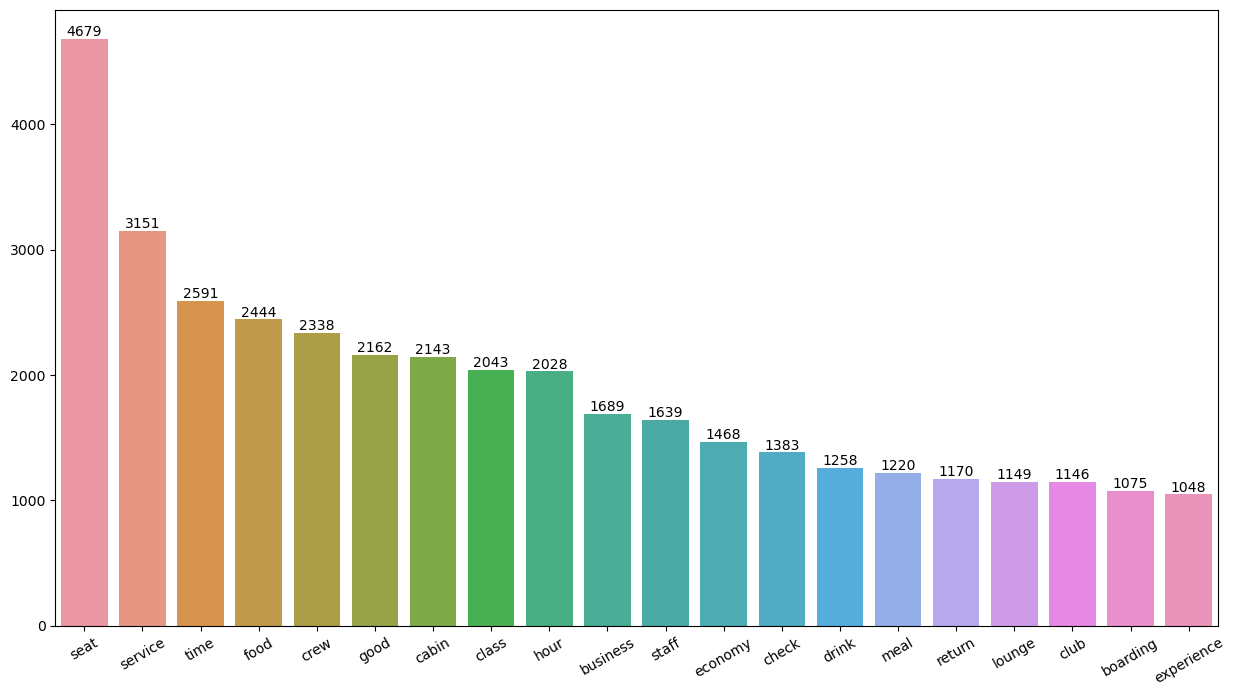

In [128]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<Axes: >

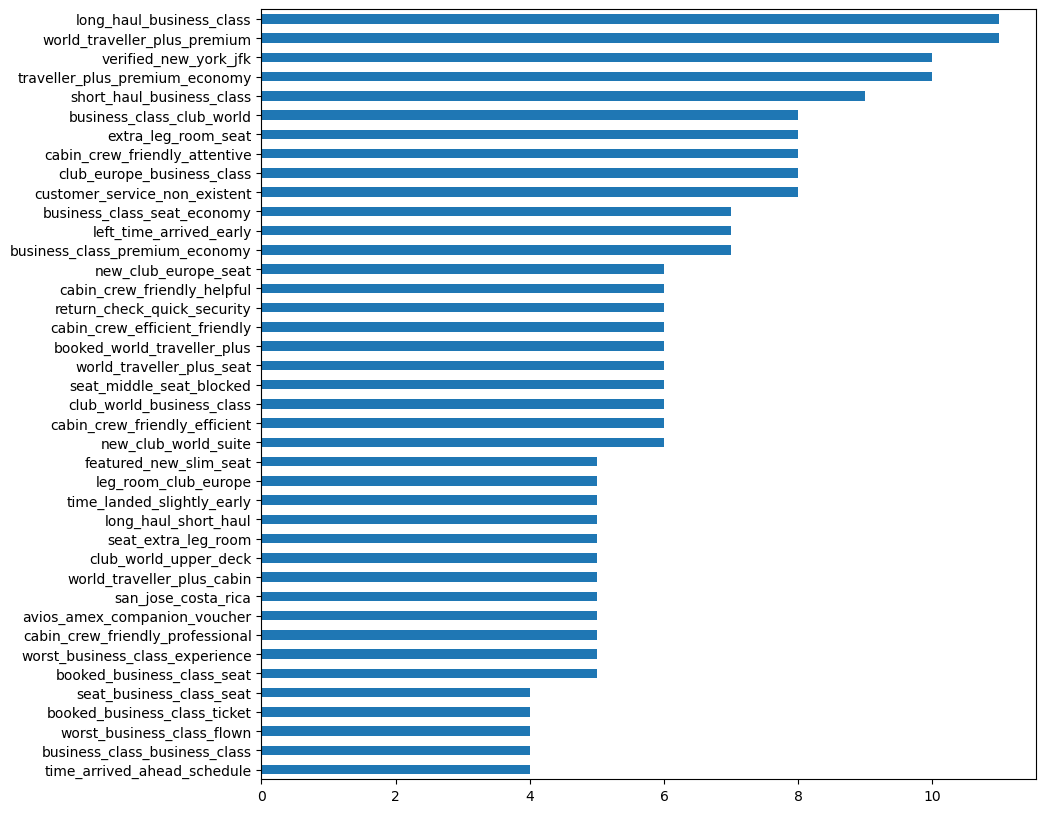

In [132]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.Corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

In [133]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

In [135]:
reviews_1_3 = " ".join(ratings_1_3.Corpus)
reviews_4_6 = " ".join(ratings_4_6.Corpus)
reviews_7_10 = " ".join(ratings_7_10.Corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


<Axes: >

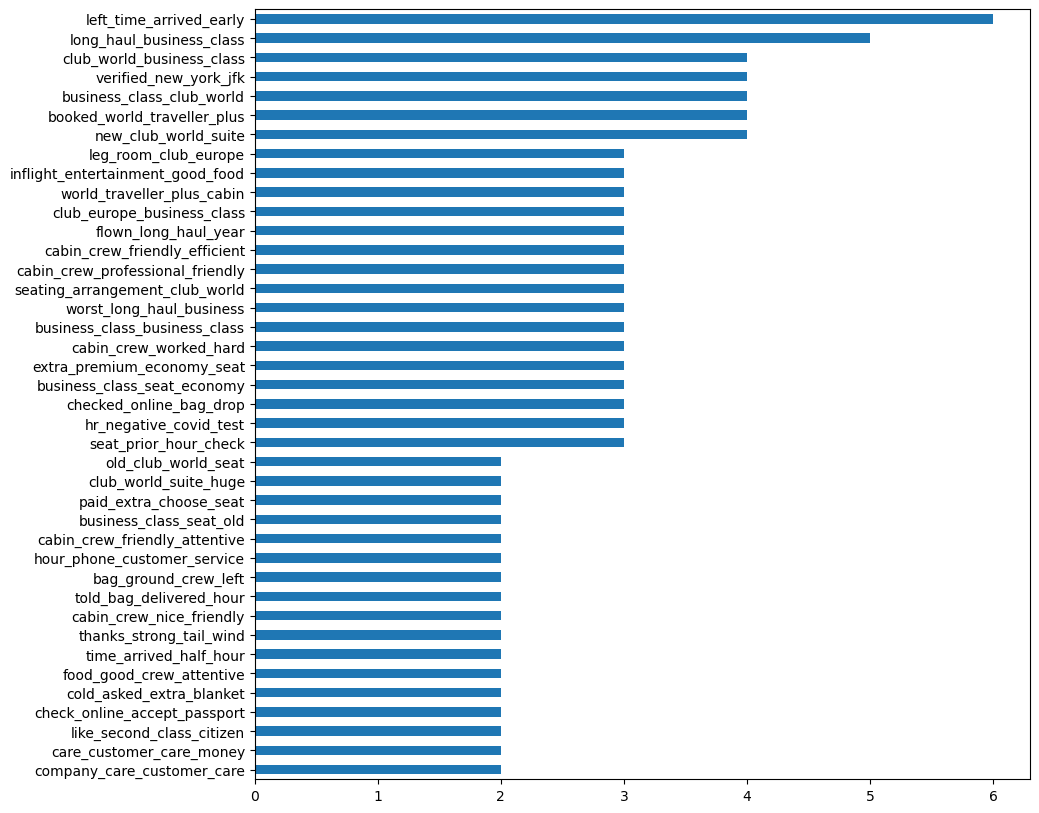

In [136]:
new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

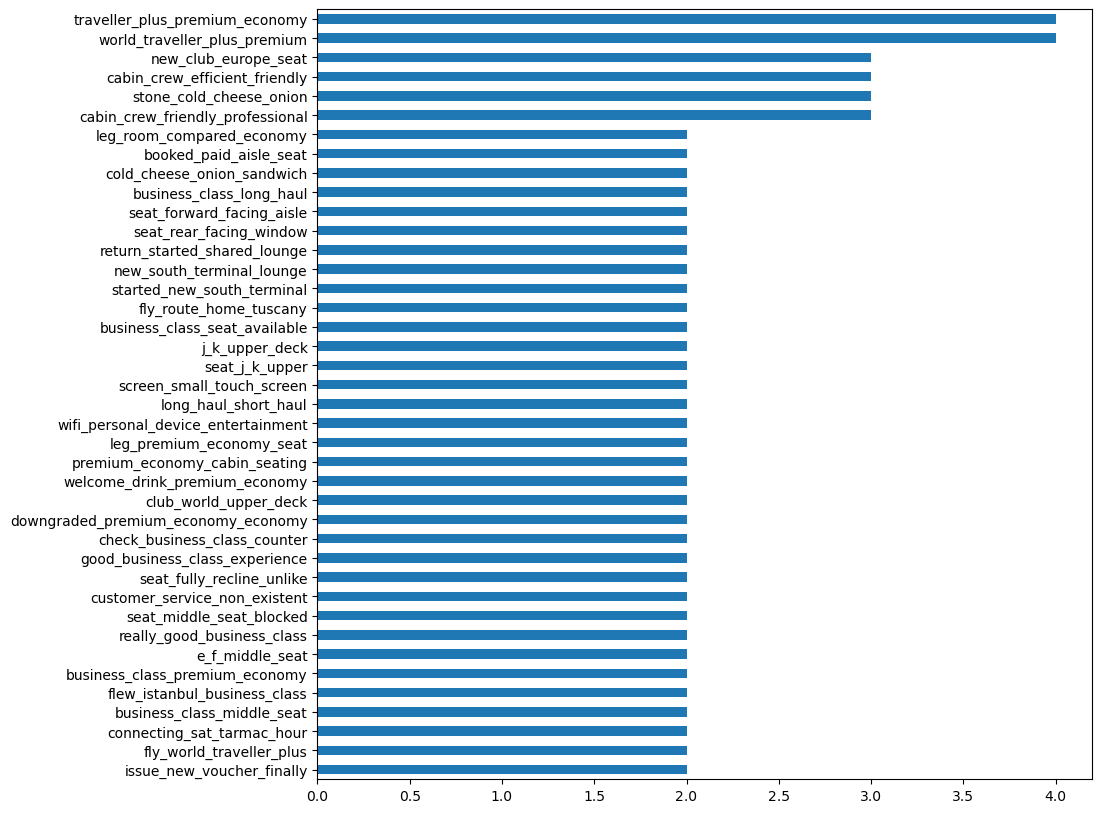

In [137]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

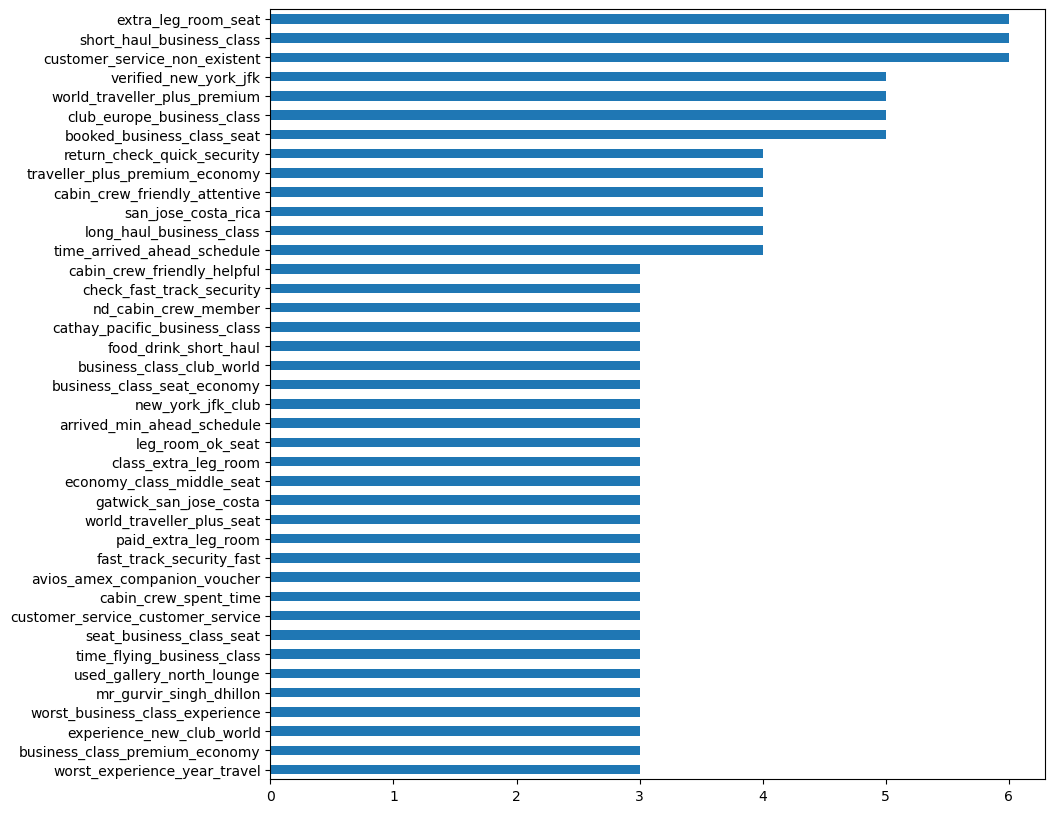

In [138]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

In [143]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()

# Function to calculate sentiment label
def get_sentiment_label(text):
    score = vds.polarity_scores(text)['compound']
    if score > 0.2:
        return "Positive"  # Positive sentiment
    elif score < 0:
        return "Negative"  # Negative sentiment
    else:
        return "Neutral"  # Neutral sentiment

# Apply the function to the 'Corpus' column
df['label'] = df['Corpus'].apply(get_sentiment_label)

print(df[['Corpus', 'label']])

                                                 Corpus  label
0     first time flew british airway huge disappoint...     -1
1     pretty good flight still small thing improved ...      1
2     check fine priority fast track line security b...      1
3     british airway absolute rubbish fly amsterdam ...     -1
4     flight time changed last minute without warnin...      1
...                                                 ...    ...
3896  flew lhr vie return operated bmi ba aircraft a...      1
3897  lhr ham purser address club passenger name boa...      1
3898  son worked british airway urged fly british ai...      1
3899  london city new york jfk via shannon really ni...      1
3900  sin lhr ba b first class old aircraft seat pri...     -1

[3896 rows x 2 columns]


In [146]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Create an object of CountVectorizer
vect = CountVectorizer()

# Apply transformation on the Corpus
tf = vect.fit_transform(df.Corpus)
tf_feature_names = vect.get_feature_names_out()

# Declare the number of topics
number_of_topics = 8
model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

# Fit the term-frequency data to the LDA model
model.fit(tf)

# Create a dictionary to store topic words and weights
topic_dict = {}

# Loop through model components (topics)
for topic_idx, topic in enumerate(model.components_):
    # Extract top 10 words and their corresponding weights for each topic
    words = [tf_feature_names[i] for i in topic.argsort()[:-11:-1]]
    weights = [topic[i] for i in topic.argsort()[:-11:-1]]
    
    # Store in the dictionary
    topic_dict[f"Topic {topic_idx} words"] = words
    topic_dict[f"Topic {topic_idx} weights"] = [round(w, 1) for w in weights]

# Convert the dictionary into a DataFrame
df_topic = pd.DataFrame(topic_dict)

  Topic 0 words  Topic 0 weights Topic 1 words  Topic 1 weights Topic 2 words  \
0          meal            435.4        flight           3362.4          seat   
1       service            292.6            ba           1305.9           row   
2            ba            285.9          crew           1064.7         front   
3          food            273.4          time            918.0        flight   
4         drink            206.9       service            838.3        window   
5          crew            204.0         cabin            826.6         aisle   
6        served            198.9          seat            821.5       economy   
7         cabin            198.1          good            760.4           leg   
8         first            193.5          food            677.5     passenger   
9       chicken            186.6        london            653.2         space   

   Topic 2 weights Topic 3 words  Topic 3 weights Topic 4 words  \
0            514.3        flight         

In [147]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,meal,435.4,flight,3362.4,seat,514.3,flight,1030.4,ba,23.2,flight,1069.3,flight,1995.3,seat,1646.1
1,service,292.6,ba,1305.9,row,145.9,ba,533.0,cabin,18.8,good,989.9,ba,1284.9,ba,1343.1
2,ba,285.9,crew,1064.7,front,108.5,day,494.9,passenger,18.0,lounge,924.0,hour,952.6,class,960.8
3,food,273.4,time,918.0,flight,108.1,customer,481.3,budapest,15.5,seat,791.3,seat,811.3,airline,873.4
4,drink,206.9,service,838.3,window,107.3,british,436.6,los,15.1,club,709.2,staff,640.3,business,820.8
5,crew,204.0,cabin,826.6,aisle,101.1,airway,435.1,angeles,15.1,class,687.7,would,610.1,service,722.3
6,served,198.9,seat,821.5,economy,100.2,call,381.8,terrible,14.2,food,651.2,check,591.4,flight,709.1
7,cabin,198.1,good,760.4,leg,100.1,london,345.1,crew,13.3,ba,540.3,time,571.9,british,698.8
8,first,193.5,food,677.5,passenger,65.1,told,334.5,started,12.5,crew,533.5,british,519.3,food,698.2
9,chicken,186.6,london,653.2,space,61.9,get,333.3,service,12.2,business,522.4,airway,510.5,airway,682.0


In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Create an object of TfidfVectorizer
tfidf_vect = TfidfVectorizer(stop_words='english', max_features=5000)

# Apply transformation on the Corpus
tfidf = tfidf_vect.fit_transform(df.Corpus)
tfidf_feature_names = tfidf_vect.get_feature_names_out()

# Declare the number of topics
number_of_topics = 8
lda_model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

# Fit the TF-IDF data to the LDA model
lda_model.fit(tfidf)

# Create a dictionary to store topic words and weights
topic_dict = {}

# Loop through model components (topics)
for topic_idx, topic in enumerate(lda_model.components_):
    # Extract top 10 words and their corresponding weights for each topic
    words = [tfidf_feature_names[i] for i in topic.argsort()[:-11:-1]]
    weights = [topic[i] for i in topic.argsort()[:-11:-1]]
    
    # Store in the dictionary
    topic_dict[f"Topic {topic_idx} words"] = words
    topic_dict[f"Topic {topic_idx} weights"] = [round(w, 1) for w in weights]

# Convert the dictionary into a DataFrame
df_topic = pd.DataFrame(topic_dict)


In [149]:
df_topic 

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,wt,5.6,informative,3.2,bangalore,2.3,jo,1.9,flight,66.8,squeezed,1.9,flight,192.8,melbourne,1.6
1,dhabi,4.7,zrh,2.9,bucket,1.6,vegan,1.7,ba,41.0,stuttgart,1.6,seat,175.1,driving,1.5
2,abu,4.7,ist,2.6,fiumicino,1.3,burg,1.6,customer,40.5,avianca,1.3,ba,147.9,sa,1.5
3,slim,2.5,amman,2.5,zagreb,1.3,fra,1.6,hour,39.2,accent,1.2,good,121.3,declining,1.5
4,bright,2.4,dxb,2.4,moderate,1.2,hospitality,1.5,told,36.6,ranking,1.2,crew,116.9,demanded,1.3
5,ml,1.9,seatback,2.3,kingston,1.1,research,1.3,day,35.8,medicine,1.0,food,116.6,buggy,1.3
6,cx,1.9,bru,2.2,gain,1.1,gum,1.2,cancelled,33.9,yul,1.0,service,113.0,authority,1.3
7,bearable,1.8,hesitate,2.1,impatient,1.1,dear,1.2,airway,29.1,hire,0.9,cabin,109.6,drab,1.2
8,goodbye,1.8,txl,2.1,searching,1.1,interact,1.2,british,29.1,assign,0.9,class,107.2,outer,1.1
9,escorted,1.8,gulf,2.1,choc,1.0,electrical,1.2,airport,28.6,larder,0.9,time,99.0,denmark,1.1
